![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

# **Transformers-Based Embeddings**

This notebook will cover the different parameters and usages of Transformers-Based Embeddings. 

**📖 Learning Objectives:**

1. Be able to create a pipeline for embeddings using a Transformers-bases annotator.

2. Understand how to use the annotators for predictions.

3. Become comfortable using the different parameters of the annotator.

4. Import Transformers models from Hugging Face to Spark NLP.




**🔗 Helpful Links:**

- Documentaion : [Transformers in Spark NLP](https://nlp.johnsnowlabs.com/docs/en/transformers)


- Python Doc : [BertEmbeddings](https://nlp.johnsnowlabs.com/api/python/reference/autosummary/sparknlp/annotator/embeddings/bert_embeddings/index.html)


- Scala Doc : [BertEmbeddings](https://nlp.johnsnowlabs.com/api/com/johnsnowlabs/nlp/embeddings/BertEmbeddings.html)

- For extended examples of usage, see the [Spark NLP Workshop Repository](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Public/3.SparkNLP_Pretrained_Models.ipynb#scrollTo=LnPg4AgLwgXc)

## **Transformers and Spark NLP**

- Token-level embeddings using different transformers based architecture that provides dense vector representations for natural language by using a deep, pre-trained neural network with the Transformer architecture.

- Pretrained models can be loaded with `pretrained()` of the companion object.


Spark NLP has extended support for `HuggingFace` 🤗   and `TF Hub` exported models since `3.1.0` to Spark NLP 🚀 annotators. You can easily use the `saved_model` feature in HuggingFace within a few lines of codes and import any of the following types of models into Spark NLP.

<div align="center">

| **Architect** | **Embeddins**        |
|---------------|----------------------|
| Albert        | AlbertEmbeddings     |
| BERT          | BertEmbeddings       |
| CamemBERT     | CamemBertEmbeddings  |
| DeBERTa       | DeBertaEmbeddings    |
| DistilBERT    | DistilBertEmbeddings |
| Elmo          | ElmoEmbeddings       |
| Longformer    | LongformerEmbeddings |
| RoBERTa       | RoBertaEmbeddings    |
| XLM-RoBERTa   | XlmRoBertaEmbeddings |
| Xlnet         | XlnetEmbeddings      |

</div>



> We will keep working on the remaining annotators and extend this support to aditional Transformers models. To keep updated, visit [this page](https://github.com/JohnSnowLabs/spark-nlp/discussions/5669) on compatibility and development of the adaptations of TF Hub and  HuggingFace to Spark NLP. Keep tuned for the next releases.

## **Embeddings**


As mentioned above, we already have implemented many different Transformers models in Spark NLP, and specifically for embeddings we have all the versions of **`Embeddings`**, where can be any of:

- `BERT` ([BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding](https://arxiv.org/abs/1810.04805), Jacob Devlin et al.): Randomly changes input texts (for example, 15% of them) with _MASKS_ or random tokens in order to learn a language model. Given two sentences, the learning process makes two tasks: 
    - Predict the sentences by correctly replacing the wrong tokens.
    - Predict if the sentences are consecutive or not.


- `ALBERT` ([ALBERT: A Lite BERT for Self-supervised Learning of Language Representations](https://arxiv.org/abs/1909.11942), Zhenzhong Lan et al.): Same as Bert, with changes in some hyperparameters that optimizes memomy usage. The training phase instead of predicting if the two sentences are consecutive, now they predict if they were swapped or not (two consecutive sentences are input, model predict if they were given in the correct order or not).

- `CamemBERT` ([CamemBERT: a Tasty French Language Model](https://arxiv.org/abs/1911.03894), Louis Martin et al.): Based on RoBerta model, trained with French dataset.

- `DeBERTa` ([DeBERTa: Decoding-enhanced BERT with Disentangled Attention](https://arxiv.org/abs/2006.03654)): Decoding-enhanced BERT with Disentangled Attention by Pengcheng He, Xiaodong Liu, Jianfeng Gao, Weizhu Chen It is based on Google’s BERT model released in 2018 and Facebook’s RoBERTa model released in 2019.

- `DistilBERT` ([DistilBERT, a distilled version of BERT: smaller, faster, cheaper and lighter](https://arxiv.org/abs/1910.01108),Victor Sanh et al.): Distilled version of Bert (model parameters were reduced by using transfer learning from big model to smaller model). 


- `Longformer` ([Longformer: The Long-Document Transformer](https://arxiv.org/abs/2004.05150), Iz Beltagy et al.): Allows the use of upt to 4096 tokens instead of the usual limit of 512. To optimize the added computational cost, replace dense matrixes by sparse representations.



- `RoBERTa` ([RoBERTa: A Robustly Optimized BERT Pretraining Approach](https://arxiv.org/abs/1907.11692), Yinhan Liu et al.): Same as Bert, but with some different training methods (e.g., using dynamic masking in each epoch instead).



- `XlmRoBerta` ([Unsupervised Cross-lingual Representation Learning at Scale](https://arxiv.org/abs/1911.02116), Alexis Conneau et al.): Applies the training methods from RoBerta to Xlm model. 


- `Xlnet` ([XLNet: Generalized Autoregressive Pretraining for Language Understanding](https://arxiv.org/abs/1906.08237), Zhilin Yang et al.): differently than token masking applied in Bert models, it trains the language model by permuting the tokens. 


For more details on these models and others available on HuggingFace, pelase visit the [HuggingFace documentation](https://huggingface.co/docs/transformers/model_summary).

## **🎬 Colab Setup**

In [ ]:
!pip install -q pyspark==3.2.1 spark-nlp==4.3.0

In [ ]:
import sparknlp
from sparknlp.base import DocumentAssembler, EmbeddingsFinisher
from sparknlp.annotator import Tokenizer

from pyspark.ml import Pipeline
from pyspark.sql import functions as F

spark = sparknlp.start()
spark

## **🖨️ Input/Output Annotation Types**



- `Input`: DOCUMENT, TOKEN

- `Output`: WORD_EMBEDDINGS

## **`🔎PARAMETERS:`**


`dimension`: Number of embedding dimensions, by default 768

`caseSensitive`: Whether to ignore case in tokens for embeddings matching, by default False

`maxSentenceLength`: Max sentence length to process, by default 128

`configProtoBytes`: ConfigProto from tensorflow, serialized into byte array.

## **BertEmbeddings**



Token-level embeddings using BERT. BERT (Bidirectional Encoder Representations from Transformers) provides dense vector representations for natural language by using a deep, pre-trained neural network with the Transformer architecture.

The default model is `small_bert_L2_768`, if no name is provided.

References:

[BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding](https://arxiv.org/abs/1810.04805)

[google-research/bert](https://github.com/google-research/bert)


## 📌 Example Pipeline

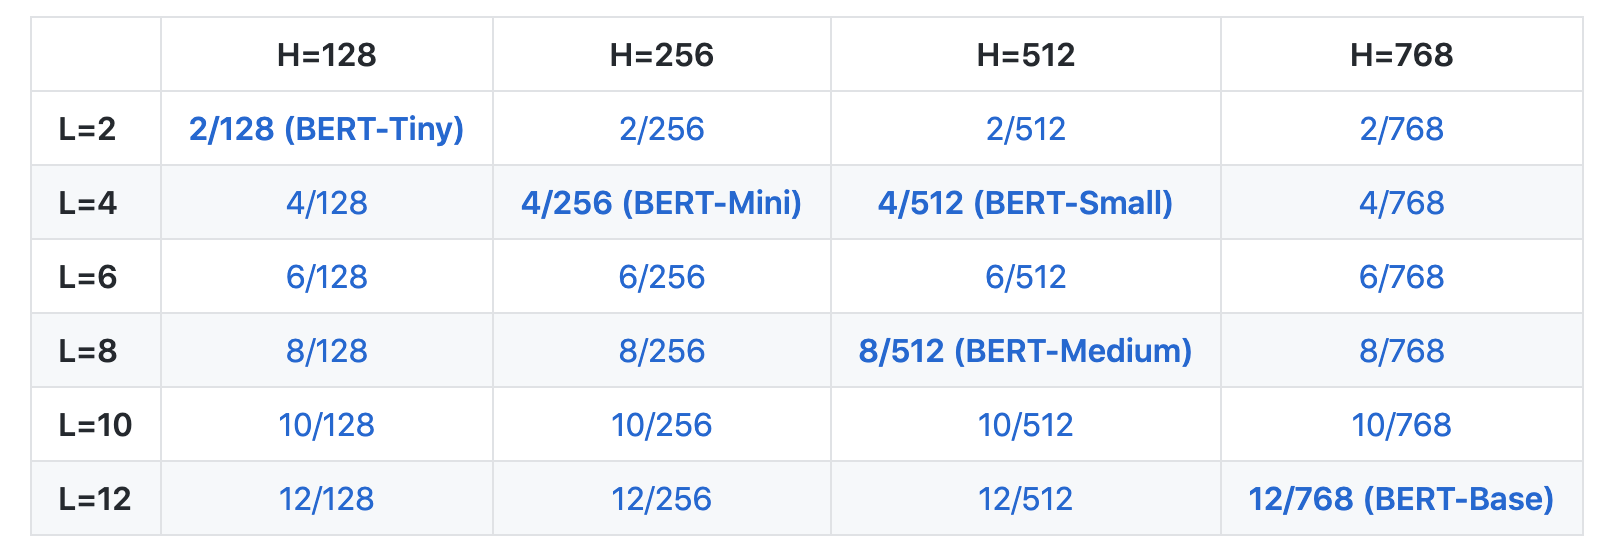

In [ ]:
from sparknlp.annotator import  BertEmbeddings

documentAssembler = DocumentAssembler() \
    .setInputCol("text") \
    .setOutputCol("document")

tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

embeddings = BertEmbeddings.pretrained("small_bert_L2_128", "en") \
    .setInputCols(["token", "document"]) \
    .setOutputCol("bert_embeddings")

pipeline = Pipeline().setStages([
    documentAssembler,
    tokenizer,
    embeddings,
])
data = spark.createDataFrame([["This is a sentence."]]).toDF("text")

result = pipeline.fit(data).transform(data)

result.show()

small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]
+-------------------+--------------------+--------------------+--------------------+
|               text|            document|               token|     bert_embeddings|
+-------------------+--------------------+--------------------+--------------------+
|This is a sentence.|[{document, 0, 18...|[{token, 0, 3, Th...|[{word_embeddings...|
+-------------------+--------------------+--------------------+--------------------+



In [ ]:
result_df = result.select(F.explode(F.arrays_zip(result.token.result, 
                                                 result.bert_embeddings.embeddings)).alias("cols")) \
                  .select(F.expr("cols['0']").alias("token"),
                          F.expr("cols['1']").alias("word_embeddings"))

result_df.show(truncate=100)

+--------+----------------------------------------------------------------------------------------------------+
|   token|                                                                                     word_embeddings|
+--------+----------------------------------------------------------------------------------------------------+
|    This|[-2.349799, 0.48053876, -0.32389045, -1.6129305, -0.91984963, 0.13639212, 0.7336475, -0.14140527,...|
|      is|[-2.135731, 0.32984716, -0.60323644, -1.6791693, -1.136132, 0.32894522, 0.48084313, 0.3675356, 0....|
|       a|[-1.8244883, -0.27088964, -1.059439, -0.9817548, -0.79510975, 0.8294154, 1.0139763, -0.22781603, ...|
|sentence|[-1.164805, -0.47254112, -0.5938258, -1.5780697, -0.50055563, 0.5650906, 0.8357443, -0.57341117, ...|
|       .|[-0.9125316, 0.45639414, -0.39754602, -1.8161117, -1.2041348, 1.4417989, 0.93367124, 0.18740168, ...|
+--------+----------------------------------------------------------------------------------------------

In [ ]:
embeddings.extractParamMap()

{Param(parent='BERT_EMBEDDINGS_68e8f02f4bcd', name='batchSize', doc='Size of every batch'): 8,
 Param(parent='BERT_EMBEDDINGS_68e8f02f4bcd', name='engine', doc='Deep Learning engine used for this model'): 'tensorflow',
 Param(parent='BERT_EMBEDDINGS_68e8f02f4bcd', name='lazyAnnotator', doc='Whether this AnnotatorModel acts as lazy in RecursivePipelines'): False,
 Param(parent='BERT_EMBEDDINGS_68e8f02f4bcd', name='maxSentenceLength', doc='Max sentence length to process'): 128,
 Param(parent='BERT_EMBEDDINGS_68e8f02f4bcd', name='dimension', doc='Number of embedding dimensions'): 128,
 Param(parent='BERT_EMBEDDINGS_68e8f02f4bcd', name='caseSensitive', doc='whether to ignore case in tokens for embeddings matching'): False,
 Param(parent='BERT_EMBEDDINGS_68e8f02f4bcd', name='inputCols', doc='previous annotations columns, if renamed'): ['token',
  'document'],
 Param(parent='BERT_EMBEDDINGS_68e8f02f4bcd', name='outputCol', doc='output annotation column. can be left default.'): 'bert_embeddin

In [ ]:
embeddings.getDimension()

128

In [ ]:
embeddings.getStorageRef()

'small_bert_L2_128'

In [ ]:
embeddings.getCaseSensitive()

False

In [ ]:
embeddings.getMaxSentenceLength()

128

## 📌 EmbeddingsFinisher

- Extracts embeddings from Annotations into a more easily usable form.

- This is useful for example: [WordEmbeddings](https://nlp.johnsnowlabs.com/api/com/johnsnowlabs/nlp/embeddings/WordEmbeddings.html),  [SentenceEmbeddings](https://nlp.johnsnowlabs.com/api/com/johnsnowlabs/nlp/embeddings/SentenceEmbeddings.html), [ChunkEmbeddings](https://nlp.johnsnowlabs.com/api/com/johnsnowlabs/nlp/embeddings/SentenceEmbeddings.html). and all transformers based 
[BertEmbeddings](https://nlp.johnsnowlabs.com/api/com/johnsnowlabs/nlp/embeddings/BertEmbeddings.html), 
[AlbertEmbeddings](https://nlp.johnsnowlabs.com/api/python/reference/autosummary/sparknlp/annotator/embeddings/bert_embeddings/index.html),
[CamemBertEmbeddings](https://nlp.johnsnowlabs.com/api/python/reference/autosummary/sparknlp/annotator/embeddings/camembert_embeddings/index.html),
[DeBertaEmbeddings](https://nlp.johnsnowlabs.com/api/python/reference/autosummary/sparknlp/annotator/embeddings/deberta_embeddings/index.html),
[DistilBertEmbeddings](https://nlp.johnsnowlabs.com/api/python/reference/autosummary/sparknlp/annotator/embeddings/distil_bert_embeddings/index.html),
[ElmoEmbeddings](https://nlp.johnsnowlabs.com/api/python/reference/autosummary/sparknlp/annotator/embeddings/elmo_embeddings/index.html),
[LongformerEmbeddings](https://nlp.johnsnowlabs.com/api/python/reference/autosummary/sparknlp/annotator/embeddings/longformer_embeddings/index.html),
[RoBertaEmbeddings](https://nlp.johnsnowlabs.com/api/python/reference/autosummary/sparknlp/annotator/embeddings/roberta_embeddings/index.html),
[XlmRoBertaEmbeddings](https://nlp.johnsnowlabs.com/api/python/reference/autosummary/sparknlp/annotator/embeddings/xlm_roberta_embeddings/index.html),


- By using EmbeddingsFinisher you can easily transform your embeddings into array of floats or vectors which are compatible with Spark ML functions such as LDA, K-mean, Random Forest classifier or any other functions that require featureCol. It provides a set of tools for creating and managing vector representations of words, sentences, and documents. EmbeddingsFinisher can be used to improve the accuracy of text classification, sentiment analysis, and other natural language processing tasks.

For more extended examples see the [Spark NLP Workshop](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Public/5.1_Text_classification_examples_in_SparkML_SparkNLP.ipynb).



> Input Annotator Types:` EMBEDDINGS`


> Output Annotator Type: `NONE`







📌`setOutputAsVector`

The setOutputAsVector parameter in EmbeddingsFinisher is a boolean parameter used to specify whether the output should be a single vector or a list of vectors. When set to true, the output will be a single vector representing the embedding of the entire sequence of tokens. When set to false, the output will be a list of vectors, one for each token in the sequence.

📌 `setCleanAnnotations`

The setCleanAnnotations parameter in EmbeddingsFinisher is used to specify whether or not to clean the annotations before the embeddings are applied. When this parameter is set to true, the annotations will be stripped of any non-word characters and all words will be lowercase. This is useful for ensuring that the embeddings are applied consistently and accurately.

In [ ]:
documentAssembler = DocumentAssembler() \
    .setInputCol("text") \
    .setOutputCol("document")

tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

embeddings = BertEmbeddings.pretrained("small_bert_L2_128", "en") \
    .setInputCols(["token", "document"]) \
    .setOutputCol("bert_embeddings")

embeddingsFinisher = EmbeddingsFinisher() \
    .setInputCols("bert_embeddings") \
    .setOutputCols("finished_sentence_embeddings") \
    .setOutputAsVector(True) \
    .setCleanAnnotations(False)

pipeline = Pipeline() \
    .setStages([
        documentAssembler,
        tokenizer,
        embeddings,
        embeddingsFinisher])

data = spark.createDataFrame([["I love working with SparkNLP"]]).toDF("text")

result = pipeline.fit(data).transform(data)

result.show()

small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]
+--------------------+--------------------+--------------------+--------------------+----------------------------+
|                text|            document|               token|     bert_embeddings|finished_sentence_embeddings|
+--------------------+--------------------+--------------------+--------------------+----------------------------+
|I love working wi...|[{document, 0, 27...|[{token, 0, 0, I,...|[{word_embeddings...|        [[-1.006893157958...|
+--------------------+--------------------+--------------------+--------------------+----------------------------+



In [ ]:
result.select("finished_sentence_embeddings").show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
result.select('finished_sentence_embeddings').take(1)

[Row(finished_sentence_embeddings=[DenseVector([-1.0069, 0.4526, -0.1001, -1.8652, -0.6375, 0.5062, 0.5155, 1.8001, -0.7341, 0.395, 0.1502, 0.5722, -1.6465, 0.0965, 2.0447, 0.0355, -1.0144, 1.0591, -0.7204, 0.7145, -0.1776, -1.5461, 1.0741, 1.7516, 0.8044, -1.257, 0.8603, 0.2263, -0.3408, 0.8939, -1.5342, 0.5465, -0.4991, 0.1304, 1.2313, -2.204, -1.0792, -0.3636, -1.0208, -0.6547, 0.5032, 0.1019, 0.2091, -0.3954, -0.3934, -2.3459, 0.8113, -1.4739, -0.6832, 1.6797, 2.2599, 0.9853, -0.5391, -0.2379, 1.1953, -1.8772, 2.3275, -0.6867, -0.7971, 2.5698, 0.2042, -1.0965, -0.7126, -1.6287, -2.0112, -0.1732, -0.2374, 0.5779, -1.3127, -0.6694, -0.3367, -0.6882, 0.6727, 0.281, -1.799, -0.8804, -0.4389, 1.2738, 2.58, -0.5278, 0.1684, -0.2292, 0.2363, 0.3432, 0.6441, 0.2013, 0.0593, 0.0812, 1.0496, -1.2299, 0.3145, 2.546, -1.0754, 1.5526, -0.0005, 0.6171, -0.1225, -1.5255, 1.7006, 0.9172, -0.1771, -1.3197, -0.1499, -0.3958, 1.2687, -0.6433, -1.0114, 0.2207, 0.2207, -1.2231, -0.7189, 1.0756, 1.0525,

In [ ]:
result.select("token.result", "finished_sentence_embeddings").show()

+--------------------+----------------------------+
|              result|finished_sentence_embeddings|
+--------------------+----------------------------+
|[I, love, working...|        [[-1.006893157958...|
+--------------------+----------------------------+



## **DeBertaEmbeddings**

The DeBERTa model was proposed in DeBERTa: Decoding-enhanced BERT with Disentangled Attention by Pengcheng He, Xiaodong Liu, Jianfeng Gao, Weizhu Chen It is based on Google’s BERT model released in 2018 and Facebook’s RoBERTa model released in 2019.

This model requires input tokenization with SentencePiece model, which is provided by Spark NLP (See tokenizers package).

The default model is `deberta_v3_base`, if no name is provided.

References:

[DeBERTa: Decoding-enhanced BERT with Disentangled Attention](https://arxiv.org/abs/2006.03654)

https://github.com/microsoft/DeBERTa

https://www.microsoft.com/en-us/research/blog/microsoft-deberta-surpasses-human-performance-on-the-superglue-benchmark/



For extended examples of usage, see the Examples. To see which models are compatible and how to import them see [Import Transformers into Spark NLP](https://github.com/JohnSnowLabs/spark-nlp/discussions/5669) 🚀.

📌 Example Pipeline

In [ ]:
from sparknlp.annotator import DeBertaEmbeddings

documentAssembler = DocumentAssembler() \
    .setInputCol("text") \
    .setOutputCol("document")

tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

embeddings = DeBertaEmbeddings.pretrained("deberta_v3_base", "en") \
    .setInputCols(["token", "document"]) \
    .setOutputCol("deberta_embeddings")

pipeline = Pipeline().setStages([
    documentAssembler,
    tokenizer,
    embeddings,
])
data = spark.createDataFrame([["This is a sentence."]]).toDF("text")

result = pipeline.fit(data).transform(data)

result.show()

deberta_v3_base download started this may take some time.
Approximate size to download 416.2 MB
[OK!]
+-------------------+--------------------+--------------------+--------------------+
|               text|            document|               token|  deberta_embeddings|
+-------------------+--------------------+--------------------+--------------------+
|This is a sentence.|[{document, 0, 18...|[{token, 0, 3, Th...|[{word_embeddings...|
+-------------------+--------------------+--------------------+--------------------+



In [ ]:
result_df = result.select(F.explode(F.arrays_zip(result.token.result, 
                                                 result.deberta_embeddings.embeddings)).alias("cols")) \
                  .select(F.expr("cols['0']").alias("token"),
                          F.expr("cols['1']").alias("word_embeddings"))

result_df.show(truncate=100)

+--------+----------------------------------------------------------------------------------------------------+
|   token|                                                                                     word_embeddings|
+--------+----------------------------------------------------------------------------------------------------+
|    This|[1.3355583, 0.3242047, -0.31513152, 0.5059271, -0.9148884, -0.05824972, -0.7914816, 0.1270009, -0...|
|      is|[0.49521476, 0.11863658, -0.37761182, 0.8799349, 0.31811938, -0.41431552, 0.54637223, 0.06393835,...|
|       a|[0.8225134, -0.3715731, -0.49974415, 0.68892944, -0.47775856, 0.16794936, 0.36613566, 0.10015561,...|
|sentence|[0.34822834, -0.36681104, -0.47873875, -0.2761931, -0.10579429, 0.46090978, 0.39098018, 0.1785630...|
|       .|[0.43014112, 0.3085406, -0.8924133, -0.39381033, 0.27380526, 0.0074824393, 0.17555088, 0.2438903,...|
+--------+----------------------------------------------------------------------------------------------

In [ ]:
embeddings.extractParamMap()

{Param(parent='DEBERTA_EMBEDDINGS_726558cf0120', name='dimension', doc='Number of embedding dimensions'): 768,
 Param(parent='DEBERTA_EMBEDDINGS_726558cf0120', name='engine', doc='Deep Learning engine used for this model'): 'tensorflow',
 Param(parent='DEBERTA_EMBEDDINGS_726558cf0120', name='lazyAnnotator', doc='Whether this AnnotatorModel acts as lazy in RecursivePipelines'): False,
 Param(parent='DEBERTA_EMBEDDINGS_726558cf0120', name='batchSize', doc='Size of every batch'): 8,
 Param(parent='DEBERTA_EMBEDDINGS_726558cf0120', name='maxSentenceLength', doc='Max sentence length to process'): 128,
 Param(parent='DEBERTA_EMBEDDINGS_726558cf0120', name='caseSensitive', doc='whether to ignore case in tokens for embeddings matching'): True,
 Param(parent='DEBERTA_EMBEDDINGS_726558cf0120', name='inputCols', doc='previous annotations columns, if renamed'): ['token',
  'document'],
 Param(parent='DEBERTA_EMBEDDINGS_726558cf0120', name='outputCol', doc='output annotation column. can be left def

In [ ]:
embeddings.getDimension()

768

In [ ]:
embeddings.getStorageRef()

'deberta_v3_base'

In [ ]:
embeddings.getCaseSensitive()

True

In [ ]:
embeddings.getMaxSentenceLength()

128

## **DistilBertEmbeddings**

DistilBERT is a small, fast, cheap and light Transformer model trained by distilling BERT base. It has 40% less parameters than `bert-base-uncased`, runs 60% faster while preserving over 95% of BERT’s performances as measured on the GLUE language understanding benchmark

The default model is `distilbert_base_cased`, if no name is provided.

Notes:
- DistilBERT doesn’t have `token_type_ids`, you don’t need to indicate which token belongs to which segment. Just separate your segments with the separation token `tokenizer.sep_token` (or `[SEP]`).
- DistilBERT doesn’t have options to select the input positions (`position_ids` input). This could be added if necessary though, just let us know if you need this option.

References:

[DistilBERT, a distilled version of BERT: smaller, faster, cheaper and lighter](https://arxiv.org/abs/1910.01108)





For extended examples of usage, see the Examples. To see which models are compatible and how to import them see [Import Transformers into Spark NLP](https://github.com/JohnSnowLabs/spark-nlp/discussions/5669) 🚀.

📌 Example Pipeline

In [ ]:
from sparknlp.annotator import DistilBertEmbeddings

documentAssembler = DocumentAssembler() \
    .setInputCol("text") \
    .setOutputCol("document")

tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

embeddings = DistilBertEmbeddings.pretrained("distilbert_base_cased", "en") \
    .setInputCols(["token", "document"]) \
    .setOutputCol("distilbert_embeddings")

pipeline = Pipeline().setStages([
    documentAssembler,
    tokenizer,
    embeddings,
])
data = spark.createDataFrame([["This is a sentence."]]).toDF("text")

result = pipeline.fit(data).transform(data)

result.show()

distilbert_base_cased download started this may take some time.
Approximate size to download 232.7 MB
[OK!]
+-------------------+--------------------+--------------------+---------------------+
|               text|            document|               token|distilbert_embeddings|
+-------------------+--------------------+--------------------+---------------------+
|This is a sentence.|[{document, 0, 18...|[{token, 0, 3, Th...| [{word_embeddings...|
+-------------------+--------------------+--------------------+---------------------+



In [ ]:
result_df = result.select(F.explode(F.arrays_zip(result.token.result, 
                                                 result.distilbert_embeddings.embeddings)).alias("cols")) \
                  .select(F.expr("cols['0']").alias("token"),
                          F.expr("cols['1']").alias("word_embeddings"))

result_df.show(truncate=100)

+--------+----------------------------------------------------------------------------------------------------+
|   token|                                                                                     word_embeddings|
+--------+----------------------------------------------------------------------------------------------------+
|    This|[0.112722404, -0.1982711, 0.5360897, -0.27253708, -0.075685106, 0.2642052, 0.23035696, 0.18294188...|
|      is|[0.35534418, 0.13215211, 0.40981454, 0.14036116, 0.438352, 0.11940758, -0.17943336, -0.011821393,...|
|       a|[0.3280855, -0.062693246, -0.01759555, -0.024373924, 0.5054029, -0.3345127, 0.18225227, 0.1259037...|
|sentence|[0.15617228, 0.29678234, 0.22324994, -0.04568948, 0.1966655, 0.095580526, -0.037151217, 0.1165782...|
|       .|[0.45411414, 0.0117348805, 0.19012982, 0.117825516, 0.28852603, 0.085773185, -0.061838843, -0.229...|
+--------+----------------------------------------------------------------------------------------------

In [ ]:
embeddings.extractParamMap()

{Param(parent='DISTILBERT_EMBEDDINGS_8538f657c1cb', name='batchSize', doc='Size of every batch'): 8,
 Param(parent='DISTILBERT_EMBEDDINGS_8538f657c1cb', name='dimension', doc='Number of embedding dimensions'): 768,
 Param(parent='DISTILBERT_EMBEDDINGS_8538f657c1cb', name='engine', doc='Deep Learning engine used for this model'): 'tensorflow',
 Param(parent='DISTILBERT_EMBEDDINGS_8538f657c1cb', name='lazyAnnotator', doc='Whether this AnnotatorModel acts as lazy in RecursivePipelines'): False,
 Param(parent='DISTILBERT_EMBEDDINGS_8538f657c1cb', name='maxSentenceLength', doc='Max sentence length to process'): 128,
 Param(parent='DISTILBERT_EMBEDDINGS_8538f657c1cb', name='caseSensitive', doc='whether to ignore case in tokens for embeddings matching'): True,
 Param(parent='DISTILBERT_EMBEDDINGS_8538f657c1cb', name='inputCols', doc='previous annotations columns, if renamed'): ['token',
  'document'],
 Param(parent='DISTILBERT_EMBEDDINGS_8538f657c1cb', name='outputCol', doc='output annotation

In [ ]:
embeddings.getDimension()

768

In [ ]:
embeddings.getStorageRef()

'distilbert_base_cased'

In [ ]:
embeddings.getCaseSensitive()

True

In [ ]:
embeddings.getMaxSentenceLength()

128

## **RoBertaEmbeddings**

The RoBERTa model was proposed in RoBERTa: A Robustly Optimized BERT Pretraining Approach by Yinhan Liu, Myle Ott, Naman Goyal, Jingfei Du, Mandar Joshi, Danqi Chen, Omer Levy, Mike Lewis, Luke Zettlemoyer, Veselin Stoyanov. It is based on Google's BERT model released in 2018.

It builds on BERT and modifies key hyperparameters, removing the next-sentence pretraining objective and training with much larger mini-batches and learning rates.

The default model is `roberta_base`, if no name is provided.

Notes:
- RoBERTa has the same architecture as BERT, but uses a byte-level BPE as a tokenizer (same as GPT-2) and uses a different pretraining scheme.
- RoBERTa doesn’t have `token_type_ids`, you don’t need to indicate which token belongs to which segment. Just separate your segments with the separation token `tokenizer.sep_token` (or `</s>`)

References:

[RoBERTa: A Robustly Optimized BERT Pretraining Approach](https://arxiv.org/abs/1907.11692)




For extended examples of usage, see the Examples. To see which models are compatible and how to import them see [Import Transformers into Spark NLP](https://github.com/JohnSnowLabs/spark-nlp/discussions/5669) 🚀.

📌 Example Pipeline

In [ ]:
from sparknlp.annotator import RoBertaEmbeddings

documentAssembler = DocumentAssembler() \
    .setInputCol("text") \
    .setOutputCol("document")

tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

embeddings = RoBertaEmbeddings.pretrained("roberta_base", "en") \
    .setInputCols(["token", "document"]) \
    .setOutputCol("roberta_embeddings")

pipeline = Pipeline().setStages([
    documentAssembler,
    tokenizer,
    embeddings,
])
data = spark.createDataFrame([["This is a sentence."]]).toDF("text")

result = pipeline.fit(data).transform(data)

result.show()

roberta_base download started this may take some time.
Approximate size to download 284.8 MB
[OK!]
+-------------------+--------------------+--------------------+--------------------+
|               text|            document|               token|  roberta_embeddings|
+-------------------+--------------------+--------------------+--------------------+
|This is a sentence.|[{document, 0, 18...|[{token, 0, 3, Th...|[{word_embeddings...|
+-------------------+--------------------+--------------------+--------------------+



In [ ]:
result_df = result.select(F.explode(F.arrays_zip(result.token.result, 
                                                 result.roberta_embeddings.embeddings)).alias("cols")) \
                  .select(F.expr("cols['0']").alias("token"),
                          F.expr("cols['1']").alias("word_embeddings"))

result_df.show(truncate=100)

+--------+----------------------------------------------------------------------------------------------------+
|   token|                                                                                     word_embeddings|
+--------+----------------------------------------------------------------------------------------------------+
|    This|[0.093786284, 0.13879819, 0.054561447, -0.09822701, 0.5803151, 0.35010597, -0.041161597, -0.14824...|
|      is|[0.318146, 0.19426662, 0.11430391, -0.056539044, 0.36728883, 0.28514612, -0.034400634, -0.0632320...|
|       a|[0.10648708, -0.096296355, -0.07076648, -0.19278553, -0.13884611, 0.4625541, -0.10222921, -0.1612...|
|sentence|[-0.05503864, 0.30084205, -0.017401451, -0.22713384, 0.19090027, 0.40622008, 0.015909242, 0.06029...|
|       .|[0.21699843, -0.40267494, 0.1304507, 0.26032102, 0.72313684, 0.21582672, 0.029238753, -0.0992592,...|
+--------+----------------------------------------------------------------------------------------------

In [ ]:
embeddings.extractParamMap()

{Param(parent='ROBERTA_EMBEDDINGS_70ac14eb1b76', name='batchSize', doc='Size of every batch'): 8,
 Param(parent='ROBERTA_EMBEDDINGS_70ac14eb1b76', name='dimension', doc='Number of embedding dimensions'): 768,
 Param(parent='ROBERTA_EMBEDDINGS_70ac14eb1b76', name='engine', doc='Deep Learning engine used for this model'): 'tensorflow',
 Param(parent='ROBERTA_EMBEDDINGS_70ac14eb1b76', name='lazyAnnotator', doc='Whether this AnnotatorModel acts as lazy in RecursivePipelines'): False,
 Param(parent='ROBERTA_EMBEDDINGS_70ac14eb1b76', name='maxSentenceLength', doc='Max sentence length to process'): 128,
 Param(parent='ROBERTA_EMBEDDINGS_70ac14eb1b76', name='caseSensitive', doc='whether to ignore case in tokens for embeddings matching'): True,
 Param(parent='ROBERTA_EMBEDDINGS_70ac14eb1b76', name='inputCols', doc='previous annotations columns, if renamed'): ['token',
  'document'],
 Param(parent='ROBERTA_EMBEDDINGS_70ac14eb1b76', name='outputCol', doc='output annotation column. can be left def

In [ ]:
embeddings.getDimension()

768

In [ ]:
embeddings.getStorageRef()

'roberta_base'

In [ ]:
embeddings.getCaseSensitive()

True

In [ ]:
embeddings.getMaxSentenceLength()

128

# From HuggingFace to Spark NLP

Here you will learn how to export a model from HuggingFace to Spark NLP. 

For compatibility details and examples, check [this page](https://nlp.johnsnowlabs.com/docs/en/transformers#import-transformers-into-spark-nlp).

## Export and Save HuggingFace model

- Let's install `HuggingFace` and `TensorFlow`. You don't need `TensorFlow` to be installed for Spark NLP, however, we need it to load and save models from HuggingFace.
- We lock TensorFlow on `2.11.0` version and Transformers on `4.25.1`. This doesn't mean it won't work with the future releases, but we wanted you to know which versions have been tested successfully.

For more embeddings import notebook please check [Import Transformers into Spark NLP 🚀](https://github.com/JohnSnowLabs/spark-nlp/discussions/5669)

In [ ]:
!pip install -q transformers==4.25.1 tensorflow==2.11.0

- HuggingFace comes with a native `saved_model` feature inside `save_pretrained` function for TensorFlow based models. We will use that to save it as TF `SavedModel`.
- We'll use [bert-base-cased](https://huggingface.co/bert-base-cased) model from HuggingFace as an example
- In addition to `TFBertModel` we also need to save the `BertTokenizer`. This is the same for every model, these are assets needed for tokenization inside Spark NLP.

In [ ]:
from transformers import TFBertModel, BertTokenizer 
import tensorflow as tf

MODEL_NAME = 'bert-base-cased'

tokenizer = BertTokenizer.from_pretrained(MODEL_NAME).save_pretrained('./{}_tokenizer/'.format(MODEL_NAME))

# just in case if there is no TF/Keras file provided in the model
# we can just use `from_pt` and convert PyTorch to TensorFlow
try:
  print('try downloading TF weights')
  model = TFBertModel.from_pretrained(MODEL_NAME)
except:
  print('try downloading PyTorch weights')
  model = TFBertModel.from_pretrained(MODEL_NAME, from_pt=True)

# Define TF Signature
@tf.function(
  input_signature=[
      {
          "input_ids": tf.TensorSpec((None, None), tf.int32, name="input_ids"),
          "attention_mask": tf.TensorSpec((None, None), tf.int32, name="attention_mask"),
          "token_type_ids": tf.TensorSpec((None, None), tf.int32, name="token_type_ids"),
      }
  ]
)
def serving_fn(input):
    return model(input)

model.save_pretrained("./{}".format(MODEL_NAME), saved_model=True, signatures={"serving_default": serving_fn})


try downloading TF weights


Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Let's have a look inside these two directories and see what we are dealing with:

In [ ]:
!ls -l {MODEL_NAME}

total 423356
-rw-r--r-- 1 root root       628 Jan 11 19:02 config.json
drwxr-xr-x 3 root root      4096 Jan 11 19:02 saved_model
-rw-r--r-- 1 root root 433508352 Jan 11 19:02 tf_model.h5


In [ ]:
!ls -l {MODEL_NAME}/saved_model/1

total 8800
drwxr-xr-x 2 root root    4096 Jan 11 19:02 assets
-rw-r--r-- 1 root root      54 Jan 11 19:02 fingerprint.pb
-rw-r--r-- 1 root root  165091 Jan 11 19:02 keras_metadata.pb
-rw-r--r-- 1 root root 8827430 Jan 11 19:02 saved_model.pb
drwxr-xr-x 2 root root    4096 Jan 11 19:02 variables


In [ ]:
!ls -l {MODEL_NAME}_tokenizer

total 220
-rw-r--r-- 1 root root    125 Jan 11 19:01 special_tokens_map.json
-rw-r--r-- 1 root root    399 Jan 11 19:01 tokenizer_config.json
-rw-r--r-- 1 root root 213450 Jan 11 19:01 vocab.txt


- as you can see, we need the SavedModel from `saved_model/1/` path
- we also be needing `vocab.txt` from the tokenizer
- all we need is to just copy the `vocab.txt` to `saved_model/1/assets` which Spark NLP will look for

In [ ]:
!cp {MODEL_NAME}_tokenizer/vocab.txt {MODEL_NAME}/saved_model/1/assets

## Import and Save BERT in Spark NLP


- Let's use `loadSavedModel` functon in `BertEmbeddings` which allows us to load TensorFlow model in SavedModel format
- Most params can be set later when you are loading this model in `BertEmbeddings` in runtime, so don't worry what you are setting them now
- `loadSavedModel` accepts two params, first is the path to the TF SavedModel. The second is the SparkSession that is `spark` variable we previously started via `sparknlp.start()`
- `setStorageRef` is very important. When you are training a task like NER or any Text Classification, we use this reference to bound the trained model to this specific embeddings so you won't load a different embeddings by mistake and see terrible results 😊
- It's up to you what you put in `setStorageRef` but it cannot be changed later on. We usually use the name of the model to be clear, but you can get creative if you want! 
- The `dimension` param is is purely cosmetic and won't change anything. It's mostly for you to know later via `.getDimension` what is the dimension of your model. So set this accordingly.
- NOTE: `loadSavedModel` accepts local paths in addition to distributed file systems such as `HDFS`, `S3`, `DBFS`, etc. This feature was introduced in Spark NLP 4.2.2 release. Keep in mind that the best and recommended way to move/share/reuse Spark NLP models is to use `write.save` so you can use `.load()` from any file systems natively.


In [ ]:
from sparknlp.annotator import *

bert = BertEmbeddings.loadSavedModel(
     '{}/saved_model/1'.format(MODEL_NAME),
     spark
 )\
 .setInputCols(["sentence",'token'])\
 .setOutputCol("bert")\
 .setCaseSensitive(True)\
 .setDimension(768)\
 .setStorageRef('bert_base_cased') 

- Let's save it on disk so it is easier to be moved around and also be used later via `.load` function

In [ ]:
bert.write().overwrite().save("./{}_spark_nlp".format(MODEL_NAME))

Let's clean up stuff we don't need anymore

In [ ]:
!rm -rf {MODEL_NAME}_tokenizer {MODEL_NAME}

Awesome 😎  !

This is your BERT model from HuggingFace 🤗  loaded and saved by Spark NLP 🚀 

In [ ]:
! ls -l {MODEL_NAME}_spark_nlp

total 431636
-rw-r--r-- 1 root root 441980332 Jan 11 19:45 bert_tensorflow
drwxr-xr-x 4 root root      4096 Jan 11 19:45 fields
drwxr-xr-x 2 root root      4096 Jan 11 19:45 metadata


Now let's see how we can use it on other machines, clusters, or any place you wish to use your new and shiny BERT model 😊 

In [ ]:
bert_loaded = BertEmbeddings.load("./{}_spark_nlp".format(MODEL_NAME))\
  .setInputCols(["sentence",'token'])\
  .setOutputCol("bert")\
  .setCaseSensitive(True)

In [ ]:
bert_loaded.getStorageRef()

'bert_base_cased'

That's it! You can now go wild and use hundreds of BERT models from HuggingFace 🤗 in Spark NLP 🚀 
